In [1]:
# import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

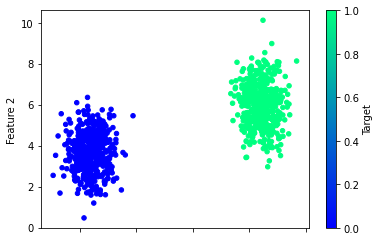

In [2]:
# generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# plot the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_scaler.fit(X_train)

# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
# add the output layer that uses a probability activation function for classification
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 755us/step - loss: 0.7342 - accuracy: 0.2813
Epoch 2/100
24/24 [==============================] - 0s 563us/step - loss: 0.7245 - accuracy: 0.3107
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 0.7164 - accuracy: 0.3400
Epoch 4/100
24/24 [==============================] - 0s 607us/step - loss: 0.7098 - accuracy: 0.3680
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.7043 - accuracy: 0.4013
Epoch 6/100
24/24 [==============================] - 0s 650us/step - loss: 0.6997 - accuracy: 0.4360
Epoch 7/100
24/24 [==============================] - 0s 693us/step - loss: 0.6959 - accuracy: 0.4827
Epoch 8/100
24/24 [==============================] - 0s 650us/step - loss: 0.6927 - accuracy: 0.5200
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.6895 - accuracy: 0.5773
Epoch 10/100
24/24 [==============================] - 0s 650us/step - loss: 0.6861 - accura

24/24 [==============================] - 0s 661us/step - loss: 0.1105 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 644us/step - loss: 0.1086 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 607us/step - loss: 0.1068 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 606us/step - loss: 0.1049 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 607us/step - loss: 0.1032 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 607us/step - loss: 0.1014 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 563us/step - loss: 0.0997 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 635us/step - loss: 0.0981 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 607us/step - loss: 0.0964 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 649us/step - loss: 0.0949 - accuracy: 

<AxesSubplot:>

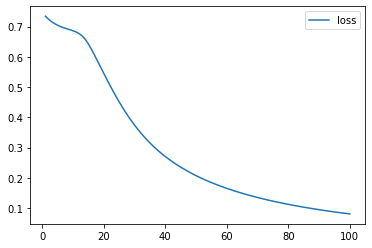

In [11]:
# create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))

# plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

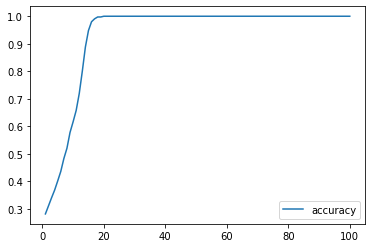

In [12]:
# plot the accuracy
history_df.plot(y='accuracy')

In [13]:
# evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0826 - accuracy: 1.0000 - 83ms/epoch - 10ms/step
Loss: 0.08264526724815369, Accuracy: 1.0


### the model achieved the same accuracy and loss function on the test dataset 

In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
new_Y_predicted = (nn_model.predict(new_X_scaled) > 0.5).astype('int32')

In [24]:
df_compare = pd.DataFrame(new_Y, columns=['data'])
df_compare['predict'] = new_Y_predicted
df_compare.index += 1
df_compare

,data,predict
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1
10,0,0
